In [4]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Dados aleatórios
np.random.seed(99)

# Numeros
Eixo_X = np.arange(0, 10, 0.1)
Eixo_Y = ( 10 - Eixo_X + np.random.normal(size=100) )

print( len(Eixo_X), len(Eixo_Y) )

# Criando o DataSet
Dicionario = {
    'Socore_Serasa' : Eixo_X,
    'Risco_Credito' : Eixo_Y
}

base_dados = pd.DataFrame( Dicionario )
base_dados.head()

100 100


,Socore_Serasa,Risco_Credito
0,0.0,9.857641
1,0.1,11.957222
2,0.2,10.083262
3,0.3,11.029812
4,0.4,9.445378


Text(0, 0.5, 'Risco Crédito')

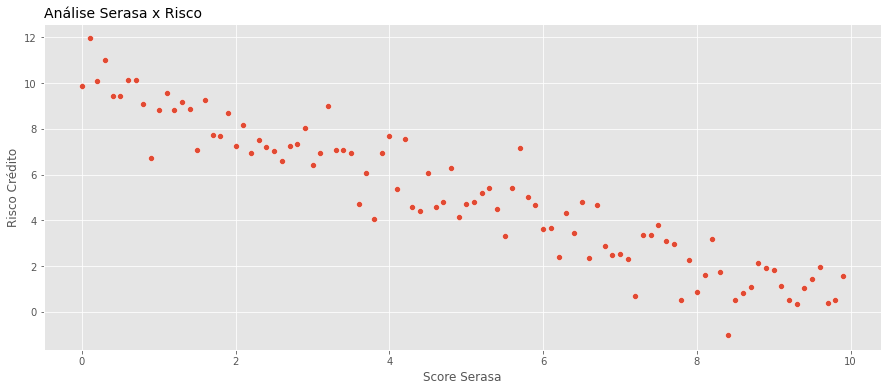

In [9]:
# Plot
# Estilo
plt.style.use('ggplot')

# Tamanho
plt.figure( figsize=(15,6) )

# Plot
plt.title('Análise Serasa x Risco', loc='left', fontsize=14)
sns.scatterplot(
    data=base_dados,
    x='Socore_Serasa',
    y='Risco_Credito'
)

# Labels
plt.xlabel('Score Serasa')
plt.ylabel('Risco Crédito')

In [11]:
# Modelo Linear

# Modelo
from sklearn.linear_model import LinearRegression
# Métrica do modelo r^2
from sklearn.metrics import r2_score

# Instânciar modelo
Modelo_Linear = LinearRegression()

# Treino do Modelo
Modelo_Linear.fit(Eixo_X.reshape(-1, 1), Eixo_Y )

LinearRegression()

In [12]:
# Coeficientes (parâmetros)
# B0 e B1 - que estima uma reta
Declive = Modelo_Linear.coef_  # B0
Inteceptar = Modelo_Linear.intercept_ # B1

Declive, Inteceptar



(array([-0.98975213]), 10.009094007657467)

Text(0, 0.5, 'Risco Crédito')

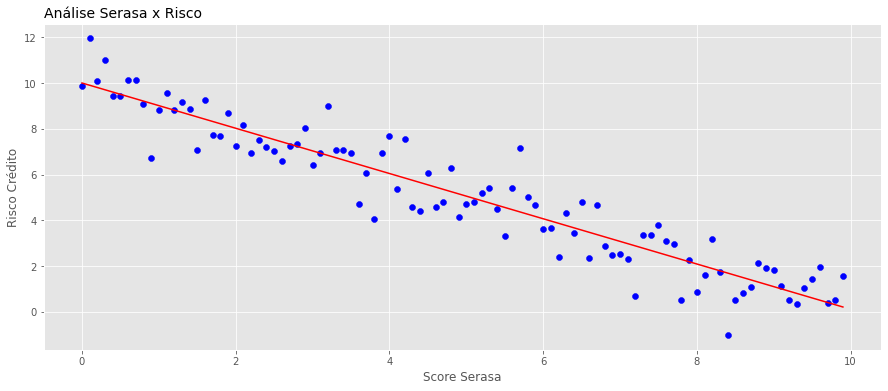

In [18]:
# Plot 
# Estilo
plt.style.use('ggplot')

# Tamanho
plt.figure( figsize=(15,6) )

# Plot
plt.title('Análise Serasa x Risco', loc='left', fontsize=14)
plt.scatter( Eixo_X, Eixo_Y, color='blue') 
plt.plot(Eixo_X, (Eixo_X * Declive + Inteceptar), color='r')
# Labels
plt.xlabel('Score Serasa')
plt.ylabel('Risco Crédito')

In [31]:
# Exportar o modelo
# Testando o modelo
print(f'O risco de crédito do cliente seria:{Modelo_Linear.predict([[1]])[0]}')

O risco de crédito do cliente seria:9.019341877726431


In [25]:
# Exportar o modelo para o Pickle
import joblib

joblib.dump(
    Modelo_Linear,
    'Modelo_Linear_v100.pkl'
)

['Modelo_Linear_v100.pkl']

In [26]:
# Lendo o modelo
# import joblib
Modelo = joblib.load('Modelo_Linear_v100.pkl')

In [29]:
Modelo.predict([[1]])

array([9.01934188])